In [28]:
import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt

In [6]:
RESULT_FILES=[
    'results/expanded_bm25_inpars_reranking_t4_15GB.pkl',
    'results/expanded_bm25_only_inpars_reranking_t4_15GB.pkl',
    'results/original_bm25_inpars_reranking_t4_15GB.pkl'
]

In [9]:
with open(RESULT_FILES[0], 'rb') as input_file:
    doc2query_all_dict = pickle.load(input_file)

In [11]:
with open(RESULT_FILES[1], 'rb') as input_file:
    doc2query_bm25_dict = pickle.load(input_file)

In [20]:
with open(RESULT_FILES[2], 'rb') as input_file:
    no_doc2query_dict = pickle.load(input_file)

In [21]:
results = []

In [22]:
for name, df in no_doc2query_dict.items():
    results.append({'expansion': 'no', 
                    'k': name.split('_')[1],
                    'ndcg@10': df.loc['mean']['ndcg@10 pipeline'],
                    'duration': df.loc['mean']['duration']})

In [24]:
for name, df in doc2query_bm25_dict.items():
    results.append({'expansion': 'bm25', 
                    'k': name.split('_')[1],
                    'ndcg@10': df.loc['mean']['ndcg@10 pipeline'],
                    'duration': df.loc['mean']['duration']})

In [26]:
for name, df in doc2query_all_dict.items():
    results.append({'expansion': 'all', 
                    'k': name.split('_')[1],
                    'ndcg@10': df.loc['mean']['ndcg@10 pipeline'],
                    'duration': df.loc['mean']['duration']})

In [29]:
r_df = pd.DataFrame(results)

In [30]:
r_df

,expansion,k,ndcg@10,duration
0,no,100,0.735460,0.830399
1,no,300,0.745794,2.486692
2,no,500,0.753604,4.075828
3,no,1000,0.751988,7.953818
4,bm25,100,0.751644,0.853906
5,bm25,300,0.759272,2.558376
6,bm25,500,0.756814,4.226670
7,bm25,1000,0.756096,8.365287
8,all,100,0.699766,0.392349
9,all,300,0.699584,1.032904


In [35]:
r_df.dtypes

expansion     object
k             object
ndcg@10      float64
duration     float64
dtype: object

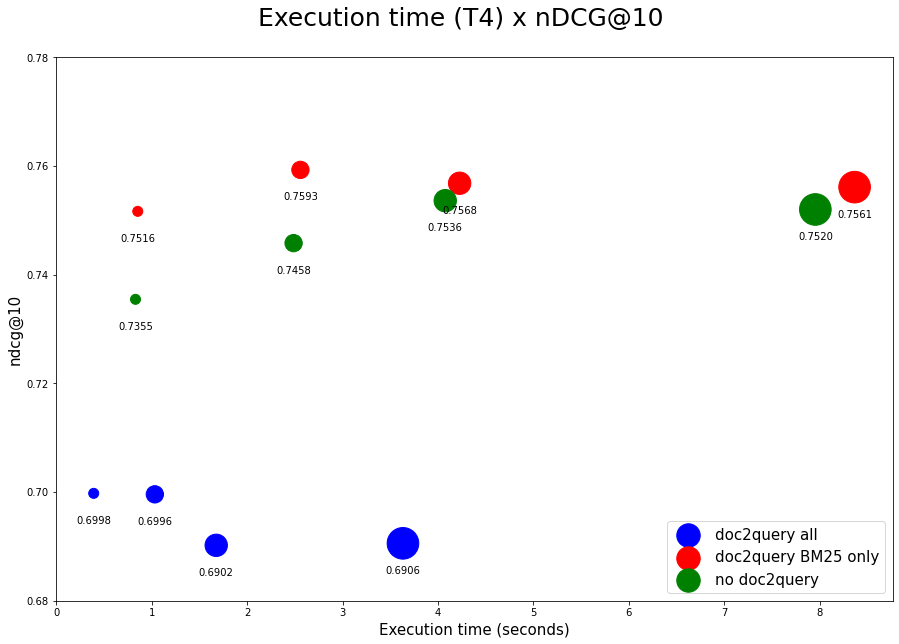

In [67]:
fig = plt.figure(figsize=[15,10])

types=['doc2query all', 'doc2query BM25 only', 'no doc2query']

colors = ['blue', 'red', 'green']
color_index = 0

handles = []
labels = []

for name, df in r_df.groupby('expansion'):
    
    new_handle = plt.scatter(df['duration'], df['ndcg@10'], color=colors[color_index], marker="o", s=df['k'].astype(int))

    handles.append(new_handle)
    labels.append("{}".format(types[color_index]))

    for x, y, name, in zip(df['duration'], df['ndcg@10'], df['ndcg@10']):
        plt.annotate("{:.4f}".format(name), (x, y), textcoords='offset points', xytext=(0, -30), ha='center')

    
    color_index += 1
    
plt.ylim(0.68, 0.78)    

plt.legend(labels=labels, handles=handles, fontsize=15, bbox_to_anchor=(1.0, 0.16))

plt.suptitle("Execution time (T4) x nDCG@10", fontsize=25, y=0.95)

plt.xlabel('Execution time (seconds)', fontsize=15)
plt.ylabel('ndcg@10', fontsize=15)

plt.show()